In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import pickle
import re

### word2vec 모델 학습 데이터 전처리

In [4]:
# 전체 민원 불러오기
with open('dasan_structured_final.bin','rb') as f:
    df1 = pickle.load(f)

In [7]:
# 컬럼확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4214079 entries, 11126169 to 15396149
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   datetime       datetime64[ns]
 1   ctype          object        
 2   regist1        object        
 3   regist2        object        
 4   rdepart        object        
 5   pdepart        object        
 6   cate1          object        
 7   cate2          object        
 8   cate3          object        
 9   dist1          object        
 10  dist2          object        
 11  regist_method  object        
 12  delimiter      object        
dtypes: datetime64[ns](1), object(12)
memory usage: 450.1+ MB


In [8]:
# 코로나 19 대분류 민원 추출
df1 = df1[df1['cate1'] == '코로나19']

In [9]:
# 민원 텍스트 파일 불러오기
with open('df_CN_stopword_final.bin','rb') as f:
    df2 = pickle.load(f)

In [10]:
# structured데이터와 민원 text 데이터 조인
df3 = pd.merge(df1,df2, left_index = True, right_index = True)

# 모델링

In [4]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

### 모델 데이터 입력 및 하이퍼 파라미터 조정

In [79]:
model = Word2Vec(sentences = df3['CN'],  # 입력할 문장, 각 문장별로 리스트 형식에 단어들이 나열 되어있는 상태
                 size=200,          # 각 단어별 차원의 크기
                 window = 10,       # 앞 뒤 단어를 몇개까지 고려할 것인가?
                 min_count=5,      # 최소 n번 이상 나온 단어만 선택하겠다
                 workers=4,         # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)
                 iter=20,           # n번 학습
                 sg=1)              # 1이면 skip gram 사용

ished; awaiting finish of 3 more threads
2021-01-29 16:07:42,659 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-29 16:07:42,788 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-29 16:07:42,838 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-29 16:07:42,839 : INFO : EPOCH - 3 : training on 1055349 raw words (946745 effective words) took 6.7s, 141806 effective words/s
2021-01-29 16:07:43,847 : INFO : EPOCH 4 - PROGRESS: at 15.94% examples, 141439 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:44,869 : INFO : EPOCH 4 - PROGRESS: at 32.18% examples, 144616 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:45,902 : INFO : EPOCH 4 - PROGRESS: at 48.65% examples, 147915 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:46,984 : INFO : EPOCH 4 - PROGRESS: at 66.37% examples, 149203 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:47,986 : INFO : EPOCH 4 - PROGRESS: at 82.41% examples, 149591 words/s, in_qsize 

### 모델 저장

In [42]:
model.save('word2vec_covid.model')

2021-01-29 15:21:56,121 : INFO : saving Word2Vec object under word2vec_covid.model, separately None
2021-01-29 15:21:56,122 : INFO : not storing attribute vectors_norm
2021-01-29 15:21:56,123 : INFO : not storing attribute cum_table
2021-01-29 15:21:56,667 : INFO : saved word2vec_covid.model


In [27]:
# 모델 불러오기
model = Word2Vec.load('C:/Users/slaz1/crawling/민원분석/word2vec_covid.model')

2021-02-13 16:48:07,331 : INFO : loading Word2Vec object from C:/Users/slaz1/crawling/민원분석/word2vec_covid.model
2021-02-13 16:48:07,687 : INFO : loading wv recursively from C:/Users/slaz1/crawling/민원분석/word2vec_covid.model.wv.* with mmap=None
2021-02-13 16:48:07,688 : INFO : setting ignored attribute vectors_norm to None
2021-02-13 16:48:07,689 : INFO : loading vocabulary recursively from C:/Users/slaz1/crawling/민원분석/word2vec_covid.model.vocabulary.* with mmap=None
2021-02-13 16:48:07,689 : INFO : loading trainables recursively from C:/Users/slaz1/crawling/민원분석/word2vec_covid.model.trainables.* with mmap=None
2021-02-13 16:48:07,689 : INFO : setting ignored attribute cum_table to None
2021-02-13 16:48:07,690 : INFO : loaded C:/Users/slaz1/crawling/민원분석/word2vec_covid.model


### 모델결과 확인

In [19]:
# 가까운 단어 확인
model.wv.most_similar('코로나', topn= 100) 

2021-02-13 16:41:19,508 : INFO : precomputing L2-norms of word weight vectors


[('감염', 0.8592240810394287),
 ('확산', 0.8130128383636475),
 ('신종', 0.810568630695343),
 ('확진자가', 0.8068861961364746),
 ('거리두기', 0.799091100692749),
 ('사회적거리두기', 0.7811461687088013),
 ('확진', 0.7748326063156128),
 ('시국', 0.7744777202606201),
 ('확진자', 0.7717039585113525),
 ('전염', 0.754664421081543),
 ('방역', 0.7342643737792969),
 ('감염자가', 0.7268776893615723),
 ('유행', 0.7226740717887878),
 ('격상', 0.7166643142700195),
 ('바이러스', 0.715640664100647),
 ('사회적거리', 0.7145156860351562),
 ('질병관리본부', 0.7113886475563049),
 ('방역수칙을', 0.7045474052429199),
 ('수칙', 0.7040162086486816),
 ('모이는', 0.703787088394165),
 ('증상', 0.685544490814209),
 ('휴업', 0.6785299777984619),
 ('모임', 0.6726921200752258),
 ('밀폐된', 0.6678919196128845),
 ('질본', 0.6677648425102234),
 ('전파', 0.6650204062461853),
 ('방역수칙', 0.6593466401100159),
 ('방역지침', 0.6536445021629333),
 ('비말', 0.6532291173934937),
 ('유흥업소', 0.6514118909835815),
 ('휴관', 0.6512829065322876),
 ('창궐', 0.6507971882820129),
 ('발열', 0.6506283283233643),
 ('마스크', 0.650062

In [22]:
model.wv.most_similar('마스크', topn= 50) 

[('우한', 0.7991283535957336),
 ('바이러스', 0.6209027767181396),
 ('메르스', 0.5697041153907776),
 ('신종', 0.5679290294647217),
 ('중국', 0.5556352734565735),
 ('코로나', 0.5490827560424805),
 ('감기', 0.5299607515335083),
 ('유행', 0.5271238684654236),
 ('전염', 0.5184222459793091),
 ('전파', 0.5146640539169312),
 ('독감', 0.5134186744689941),
 ('환자가', 0.5094836354255676),
 ('백신', 0.5026582479476929),
 ('면역력', 0.5011218786239624),
 ('감염', 0.49602827429771423),
 ('완치', 0.48988181352615356),
 ('심근경색', 0.48469892144203186),
 ('증상', 0.4809419512748718),
 ('간염', 0.46887561678886414),
 ('초토화', 0.4647349715232849),
 ('공산', 0.46443867683410645),
 ('침투', 0.4638228416442871),
 ('접종', 0.46291810274124146),
 ('유럽', 0.4592307209968567),
 ('각국', 0.4550447463989258),
 ('쇼', 0.45482751727104187),
 ('사스', 0.45469385385513306),
 ('병', 0.45362260937690735),
 ('발현', 0.45220696926116943),
 ('CO', 0.45039525628089905),
 ('알러지', 0.4498468041419983),
 ('수식억', 0.44946789741516113),
 ('일본', 0.4472360610961914),
 ('정신병자', 0.4461207985

In [28]:
# 사용 된 단어 수
len(model.wv.vocab)   

24602

In [34]:
# 단어간의 유사도 확인 후 코로나와 관련된 단어 최종 25개 선정
covid_words = ['확산', '신종', '거리두기', '확진', '전염', '방역수칙', '격상', '바이러스', '사회적거리', '질본', '비말', '미착용',
               '창궐', '발열', '마스크', '대면', '역학', '체온', '검진', '선별진료소', '잠복기', '질병관리', '손소독', '코로나', '우한']

len(covid_words)

### 코로나 관련 민원 추출

In [15]:
# 민원을 리스트 형태로 변환
text = df3['CN'].apply(lambda x : ' '.join(x))
text = text.reset_index()

In [18]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191581 entries, 0 to 2191580
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   serial  object
 1   CN      object
dtypes: object(2)
memory usage: 33.4+ MB


In [20]:
# covids_words의 단어가 포함된 text index 추출
for i in covid_words :
    print(i)
    list1 = []
    for j in range(text.shape[0]) :
        if j%1000 == 0 : 
            print(i + ':' + str(j))
        if re.search(i,text.iloc[j,1]) :
            list1.append(text.iloc[j,0])
    globals()['bool_{}'.format(i)] = list1

:311000
우한:312000
우한:313000
우한:314000
우한:315000
우한:316000
우한:317000
우한:318000
우한:319000
우한:320000
우한:321000
우한:322000
우한:323000
우한:324000
우한:325000
우한:326000
우한:327000
우한:328000
우한:329000
우한:330000
우한:331000
우한:332000
우한:333000
우한:334000
우한:335000
우한:336000
우한:337000
우한:338000
우한:339000
우한:340000
우한:341000
우한:342000
우한:343000
우한:344000
우한:345000
우한:346000
우한:347000
우한:348000
우한:349000
우한:350000
우한:351000
우한:352000
우한:353000
우한:354000
우한:355000
우한:356000
우한:357000
우한:358000
우한:359000
우한:360000
우한:361000
우한:362000
우한:363000
우한:364000
우한:365000
우한:366000
우한:367000
우한:368000
우한:369000
우한:370000
우한:371000
우한:372000
우한:373000
우한:374000
우한:375000
우한:376000
우한:377000
우한:378000
우한:379000
우한:380000
우한:381000
우한:382000
우한:383000
우한:384000
우한:385000
우한:386000
우한:387000
우한:388000
우한:389000
우한:390000
우한:391000
우한:392000
우한:393000
우한:394000
우한:395000
우한:396000
우한:397000
우한:398000
우한:399000
우한:400000
우한:401000
우한:402000
우한:403000
우한:404000
우한:405000
우한:406000
우한:407000
우한:408000
우한:409000
우한:410000
우한

In [79]:
# 하나의 데이터 프레임으로 보기
len_list = []
for i in covid_words :
    word_list.append(i)
    len_list.append(len(eval('bool_' + '{}'.format(i))))

pd.DataFrame({'word':word_list, 'len':len_list}).to_csv('단어별_민원수.csv', encoding = 'utf-8-sig', index = False)

In [100]:
# 중복되는 index 제거
index_final = set(bool_확산 + bool_신종 + bool_거리두기 + bool_확진 + bool_전염 + bool_방역수칙 + bool_격상 + 
                  bool_바이러스 + bool_사회적거리 + bool_질본 + bool_비말 + bool_미착용 + bool_창궐 + bool_발열 + 
                  bool_마스크 + bool_대면 + bool_역학 + bool_체온 + bool_검진 + bool_선별진료소 + bool_잠복기 + 
                  bool_질병관리 + bool_손소독 + bool_코로나 + bool_우한 + bool_코로나19)

In [101]:
# 코로나 19 관련 민원 수
len(list(index_final))

69323

In [102]:
# index 별도로 저장
pd.Series(list(index_final)).to_csv('코로나민원_index.csv', encoding= 'utf-8-sig', index= False)

In [104]:
df4 = df3.loc[list(index_final),:]

In [105]:
# 총 69323개의 민원 확인
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69323 entries, 14160935 to 15295009
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       69323 non-null  datetime64[ns]
 1   ctype          69323 non-null  object        
 2   regist1        69323 non-null  object        
 3   regist2        69323 non-null  object        
 4   rdepart        69323 non-null  object        
 5   pdepart        69323 non-null  object        
 6   cate1          69323 non-null  object        
 7   cate2          69323 non-null  object        
 8   cate3          69323 non-null  object        
 9   dist1          69323 non-null  object        
 10  dist2          69323 non-null  object        
 11  regist_method  69323 non-null  object        
 12  delimiter      69323 non-null  object        
 13  CN             69323 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 7.9+ MB


In [ ]:
# 저장
df4.to_csv('코로나민원.csv', encoding = 'utf-8-sig', index = False)

In [123]:
# 월별 코로나 관련 민원 수 확인
from datetime import datetime
df4['date'] = df4['datetime'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d'))
df4.groupby([df4['date'].str[:7],'ctype'])['CN'].count()

# pca로 시각화

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [23]:
# 폰트 깨짐 방지
import matplotlib.font_manager as fm
fm._rebuild()

plt.rc('font', family='NanumGothic')

2021-01-29 15:50:28,877 : INFO : Generating new fontManager, this may take some time...


In [ ]:
# 데이터 불러오기
df1 = pd.read_csv('코로나민원.csv')

In [ ]:
# 코로나 관련 문장 전체를 하나의 list로 만들기
word_list = []
num = 0
for i in df1['CN'] :
    num += 1
    if num%1000 == 0 :
        print(num)
    word_list += i
    
len(word_list)

In [ ]:
s1 = pd.Series(word_list)
# 각 단어별 등록빈도로 정렬
df_word_count = s1.value_counts().reset_index()

# 별도로 저장
df_word_count.to_csv('covid_word_list.csv', index = False, enocoding = 'utf-8-isg')

In [198]:
df_word_count['word'][:100]

0      민원
1     코로나
2     마스크
3      휴대
4      방법
     ... 
95     보호
96     정부
97    손님들
98     주민
99     공원
Name: word, Length: 100, dtype: object

In [199]:
# 상위 단어 모델에 입력
X = model[df_word_count['word'][:100]]
vocab_show = df_word_count['word'][:100]
X_show = X

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### pca 모델을 통해 2차원으로 축소

In [204]:
# pca 모델 만들기
m_pca = PCA(n_components=2)
m_pca.fit(X_show)
x_pca = m_pca.transform(X_show)

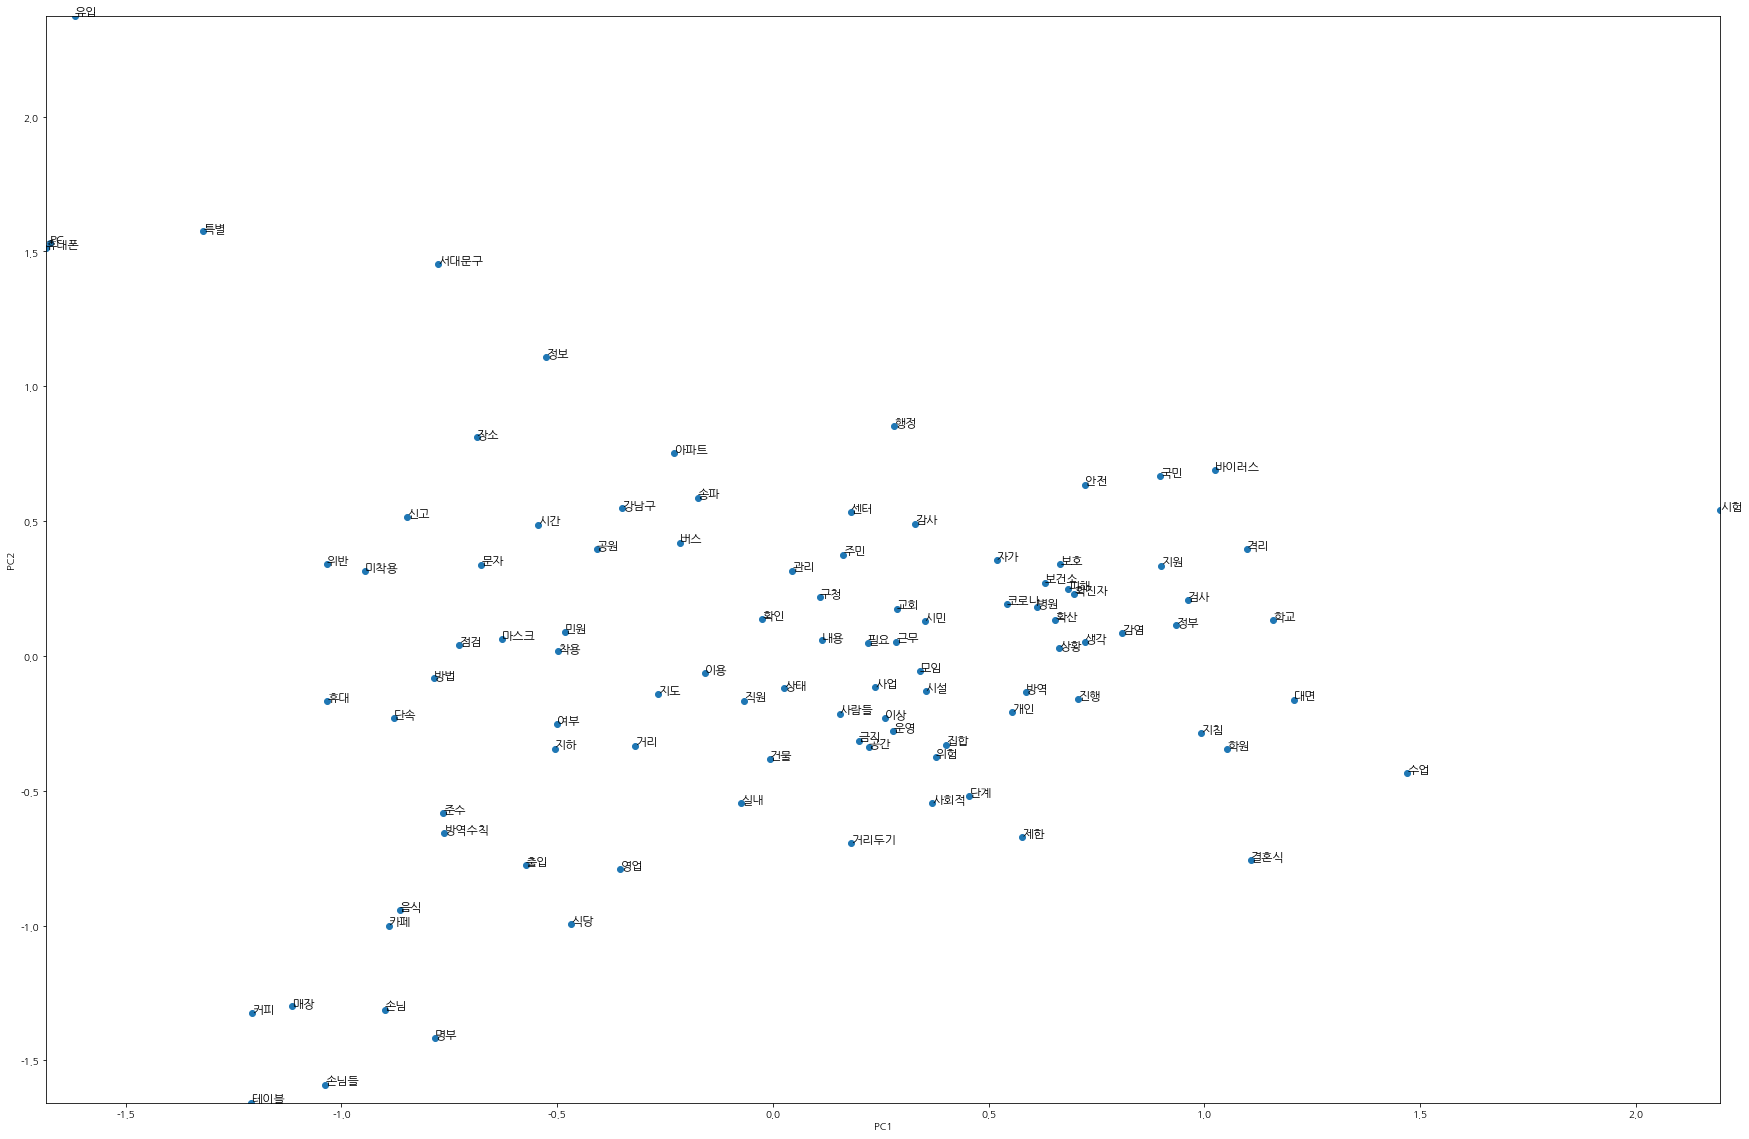

In [205]:
# 시각화
df = pd.DataFrame(x_pca, index=vocab_show, columns=['x', 'y']) 
fig = plt.figure() 
fig.set_size_inches(30,20)
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(df['x'], df['y'])
plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
for i in range(len(X_show)): plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), 
                                      fontdict={#'weight': 'bold', 
                                                'size': 12}) 
plt.xlabel("PC1") 
plt.ylabel("PC2") 
plt.show()